In [1]:
import numpy as np 
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [2]:
filenames=[]
for file in os.listdir('C:/Users/nithi/Downloads/NitishMiniPro/Genaviminipro/images'):
    filenames.append(os.path.join('C:/Users/nithi/Downloads/NitishMiniPro/Genaviminipro/images',file))

In [3]:
len(filenames)


44441

In [4]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False
model=tf.keras.models.Sequential([model,
                                  GlobalMaxPool2D()
                                 ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('C:/Users/nithi/Downloads/NitishMiniPro/Genaviminipro/images/16881.jpg', target_size=(224, 224))
img_array = img_to_array(img)
img_expand_dim=np.expand_dims(img_array,axis=0)
img_preprocess=preprocess_input(img_expand_dim)
result=model.predict(img_preprocess).flatten()
norm_result=result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([0.        , 0.01268933, 0.        , ..., 0.01375302, 0.01420404,
       0.04319221], dtype=float32)

In [6]:
def extract_features_from_images(image_path,model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_expand_dim=np.expand_dims(img_array,axis=0)
    img_preprocess=preprocess_input(img_expand_dim)
    result=model.predict(img_preprocess).flatten()
    norm_result=result/norm(result)
    return norm_result

In [7]:
extract_features_from_images(filenames[0],model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([0.        , 0.01761618, 0.00171608, ..., 0.01247239, 0.02726405,
       0.06899218], dtype=float32)

In [8]:
image_features=[]
for file in filenames[0:1000]:
    image_features.append(extract_features_from_images(file,model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━

[array([0.        , 0.01761618, 0.00171608, ..., 0.01247239, 0.02726405,
        0.06899218], dtype=float32),
 array([0.        , 0.03648944, 0.        , ..., 0.00997913, 0.02375535,
        0.04649905], dtype=float32),
 array([0.        , 0.03507714, 0.00732278, ..., 0.00283509, 0.        ,
        0.05435881], dtype=float32),
 array([0.00232165, 0.05030549, 0.00747743, ..., 0.00346684, 0.03391018,
        0.04565744], dtype=float32),
 array([0.00306834, 0.0624045 , 0.        , ..., 0.00170625, 0.02032885,
        0.0583326 ], dtype=float32),
 array([0.        , 0.1046918 , 0.00198064, ..., 0.        , 0.03033058,
        0.02712928], dtype=float32),
 array([0.        , 0.12438459, 0.01465613, ..., 0.00289705, 0.0405516 ,
        0.06534589], dtype=float32),
 array([0.        , 0.09169204, 0.01569911, ..., 0.        , 0.00503581,
        0.04560041], dtype=float32),
 array([0.        , 0.09545275, 0.01153319, ..., 0.00073008, 0.04513266,
        0.07661068], dtype=float32),
 array([0.

In [9]:
Image_features=pkl.dump(image_features,open('Image_features.pkl','wb'))

In [10]:
filenames=pkl.dump(filenames,open('filenames.pkl','wb'))

In [11]:
Image_features=pkl.load(open('Image_features.pkl','rb'))

In [12]:
filenames=pkl.load(open('filenames.pkl','rb'))

In [13]:
np.array(Image_features).shape

(1000, 2048)

In [14]:
#finding similar images

In [15]:
neighbors=NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')

In [16]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [21]:
input_image=extract_features_from_images('C:/Users/nithi/Downloads/NitishMiniPro/Genaviminipro/images/10013.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [22]:
distance,indices=neighbors.kneighbors([input_image])

In [24]:
indices[0]

array([ 13,   9, 645, 632,  32, 634], dtype=int64)

In [26]:
from IPython.display import Image

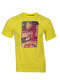

In [27]:
Image('C:/Users/nithi/Downloads/NitishMiniPro/Genaviminipro/images/10013.jpg')

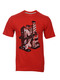

In [30]:
Image(filenames[indices[0][1]])

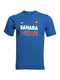

In [31]:
Image(filenames[indices[0][2]])

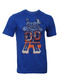

In [32]:
Image(filenames[indices[0][3]])

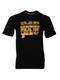

In [33]:
Image(filenames[indices[0][4]])

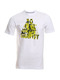

In [34]:
Image(filenames[indices[0][5]])